## Assignment 8 - SGD using linear Regression

In [1]:
## Lets import Packages from the required libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
## Loading our dataset
boston=load_boston()

In [3]:
# Shape of the dataset
boston.data.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
## Description of each feature 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_data=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [7]:
boston_data['price']=boston.target
boston_data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


## Train Test Split 

In [8]:
x=boston.data
y=boston.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

## Standardize the Train set

In [9]:
## using standard scalar starndardize the train data and tranform the test later to prevent data leakage
x=boston.data
y=boston.target

scaler=StandardScaler()

scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
# Creating a new dataframe with tranformed data
transformed_train_set=pd.DataFrame(x_train)
transformed_train_set['price']=y_train


## Write custom SGD for linear Regression


In [10]:
class SGD_scratch :
    '''The class contains various functions to perform Schocastic Gradient Descent on Linear regression
       Class includes 2 functions primarily
       1.find_w_b function : To find best (W,b) that  fits the data giving minimum loss using SGD.
       Note: Some important parameters from sklearn.SGDRegressor have also been implemented
       2.Predict Function : that predicts y label given (w,b) '''
    def __init__(self,dataset,learning_rate,k,no_iterations,shuffle=False,divide=None):
        # initiating values 
        self.data=dataset
        self.learning_rate=learning_rate
        self.k=k
        self.divide=divide
        self.no_iterations=no_iterations
        self.shuffle=shuffle
        
    def find_w_b(self):
        from sklearn.utils import shuffle
        k,no_iter=self.k,self.no_iterations
        w=np.random.randn(1,13)
        b=0
        lr_rate=self.learning_rate
        
        for i in range(no_iter):
            w_vector,b_vector=np.zeros(shape=(1,13)),0
            if shuffle:
                self.data=shuffle(self.data) #Shuffle the dataframe when shuffle=True for every iterations
            else:
                pass
            
            
            #take sample of size k and  store the data and target seprately 
            sampled_data=self.data.sample(k,replace=False)
            x=np.array(sampled_data.drop('price',axis=1))
            y=np.array(sampled_data['price'])
            residual_sum_square=0 
            for pt in range(k):
                actual_=y[pt] ## actual value y[i]
                predicts_ = np.dot(w,x[pt]) + b ## predicted value  w.T.x[pt] + intercept
                w_vector+=(-2) * x[pt] * (y[pt] - (np.dot(w,x[pt]) + b) )
                b_vector+=(-2) * (y[pt] - (np.dot(w,x[pt]) + b))
                error = (predicts_ - actual_) ** 2 # square( actual(y[i]) - predicted(y[i]) )
                residual_sum_square += error # sum of square of all the residue
            
            print("-"*20)
            print('Iteration {0} :  mean  squared error : {1} '.format(i,residual_sum_square/k))
            
            previous_state_b=b # storing the previous intercept value
            previous_state_w=w #storing the previous weights values
            
            w=w-lr_rate*(w_vector/k)
            b=b-lr_rate*(b_vector/k)    
            
            diff_vec= previous_state_w - w #calculate the difference between the vectors
            if abs(previous_state_b -b) < 0.0008  and np.sqrt(np.sum(diff_vec**2)) < 0.0008 : # exit loop if w,b value is almost same,set random threshold 0.008
                print('*'*20)
                print('State wj :', previous_state_w)
                print('State wj+1 :', w)
                print('State bj :', previous_state_b)
                print('State bj+1 :', b)
                print('Iteration terminated at :',i) 
                print('Iteration terminated at :',i) 
                break 
            
            if self.divide:
                lr_rate = lr_rate / pow((i+1),0.05)
                print('lr_rate: ',lr_rate)
            print("-"*10)    
                
        return w,b 
    
    def predict_func(self,w,b,test_set):
        predict_set=[]
        test_set=np.array(test_set)
        for pt in range(len(test_set)):
            predictions=(np.dot(w,test_set[pt])+b)
            predict_set.append(predictions[0])
        return predict_set

## Sklearn SGD Regressor

Mean Squared Error : 22.2971947293


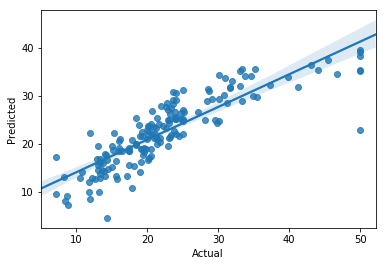

In [46]:
# SkLearn SGD classifier
n_iter=500
sklearn_model = SGDRegressor(max_iter=n_iter,alpha=0.05,shuffle=True)
sklearn_model.fit(x_train, y_train)
y_pred=sklearn_model.predict(x_test)
weights= pd.DataFrame(data=sklearn_model.coef_.T,columns=['Sklearn SGD'])
## Plotting functions 
#Scatter plot
predict_data=pd.DataFrame(data= {'Actual' : y_test,'Predicted' :y_pred})
sns.regplot(x='Actual', y='Predicted', data=predict_data)

print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

## Sklearn Linear Regression

Mean Squared Error : 22.1950284502


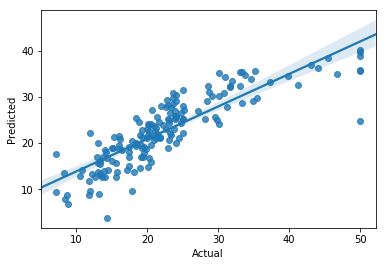

In [47]:
# SkLearn SGD classifier
sklearn_lr_model = LinearRegression()
sklearn_lr_model.fit(x_train, y_train)
y_pred=sklearn_lr_model.predict(x_test)
weights['Sklearn Linear Regression '] = pd.DataFrame(sklearn_lr_model.coef_.T)
## Plotting functions 
#Scatter plot
predict_data=pd.DataFrame(data= {'Actual' : y_test,'Predicted' :y_pred})
sns.regplot(x='Actual', y='Predicted', data=predict_data)

print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

## Custom SGD regressor : Trial 1 
      1. Initially implementing with learning rate =1 and iterations=100 
      2. For every iteration set learning rate = learning rate /2 
      3. Shuffle the dataset per iteration 

In [13]:
model=SGD_scratch(transformed_train_set,1,40,100,shuffle=True,divide=2)
w,b=model.find_w_b()
predictions=model.predict_func(w,b,x_test)
weights['Custom SGD (Trial 1)'] = pd.DataFrame(w.T)

--------------------
Iteration 0 :  mean  squared error : [ 676.09369228] 
lr_rate:  1.0
----------
--------------------
Iteration 1 :  mean  squared error : [ 20208.74597492] 
lr_rate:  0.9659363289248455
----------
--------------------
Iteration 2 :  mean  squared error : [ 2639263.27204621] 
lr_rate:  0.9143078267618279
----------
--------------------
Iteration 3 :  mean  squared error : [  3.28986510e+08] 
lr_rate:  0.8530793667891053
----------
--------------------
Iteration 4 :  mean  squared error : [  2.87615678e+10] 
lr_rate:  0.7871199821209823
----------
--------------------
Iteration 5 :  mean  squared error : [  1.92485204e+12] 
lr_rate:  0.7196699602538442
----------
--------------------
Iteration 6 :  mean  squared error : [  1.32635420e+14] 
lr_rate:  0.6529478154043212
----------
--------------------
Iteration 7 :  mean  squared error : [  8.57695860e+15] 
lr_rate:  0.5884695206938755
----------
--------------------
Iteration 8 :  mean  squared error : [  2.98338967e+1

--------------------
Iteration 88 :  mean  squared error : [  4.47157776e+24] 
lr_rate:  1.545664868629464e-07
----------
--------------------
Iteration 89 :  mean  squared error : [  1.06062845e+25] 
lr_rate:  1.2342502120330814e-07
----------
--------------------
Iteration 90 :  mean  squared error : [  5.78489728e+24] 
lr_rate:  9.850338180261016e-08
----------
--------------------
Iteration 91 :  mean  squared error : [  7.54148772e+24] 
lr_rate:  7.857090391925814e-08
----------
--------------------
Iteration 92 :  mean  squared error : [  5.60189146e+24] 
lr_rate:  6.263795956138177e-08
----------
--------------------
Iteration 93 :  mean  squared error : [  8.02697697e+24] 
lr_rate:  4.9909269048695564e-08
----------
--------------------
Iteration 94 :  mean  squared error : [  7.02927213e+24] 
lr_rate:  3.974614651596442e-08
----------
--------------------
Iteration 95 :  mean  squared error : [  5.71417707e+24] 
lr_rate:  3.16359927609215e-08
----------
--------------------
It

Mean Squared Error : 8.36279966769e+24


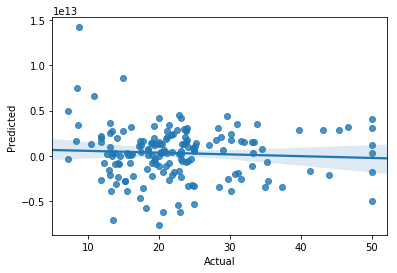

In [14]:
## Plotting functions 
#Scatter plot
predict_data=pd.DataFrame(data= {'Actual' : y_test,'Predicted' :predictions})
sns.regplot(x='Actual', y='Predicted', data=predict_data)
print('Mean Squared Error :',mean_squared_error(y_test, predictions))

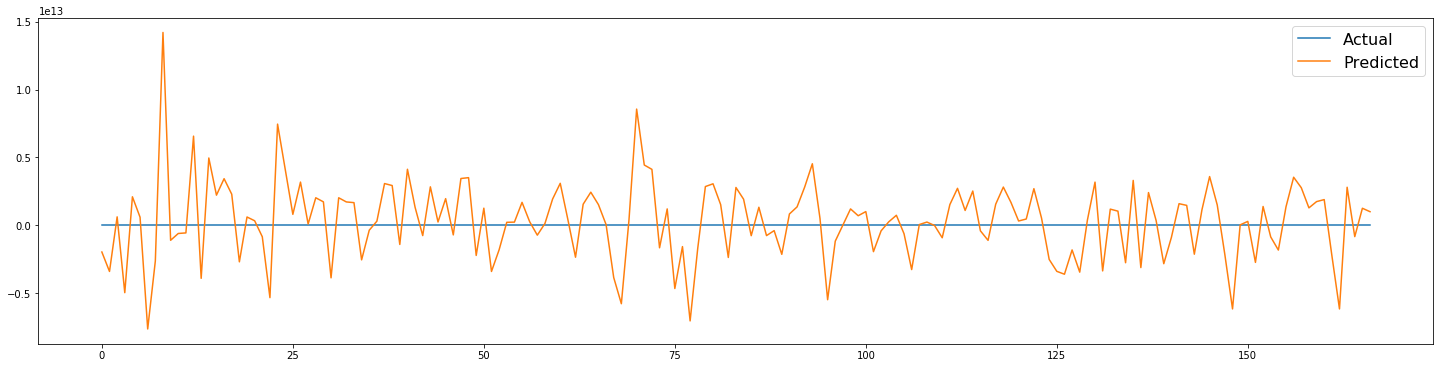

Mean Squared Error : 8.36279966769e+24


In [15]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, predictions))

## Observations :
    1. We see that the model does not perform well and gives a MSE of 8.36 e+24, with the above set parameters

## Custom SGD regressor  :Trial 2
      1. Implementing with learning rate =0.2 and iterations=500
      2. Shuffle the dataset per iteration 

In [55]:
model=SGD_scratch(transformed_train_set,0.2,40,500,shuffle=True,divide=1)
w,b=model.find_w_b()
predictions=model.predict_func(w,b,x_test)
weights['Custom SGD (Trial 2)'] = pd.DataFrame(w.T)

--------------------
Iteration 0 :  mean  squared error : [ 700.84819584] 
lr_rate:  0.2
----------
--------------------
Iteration 1 :  mean  squared error : [ 316.38821338] 
lr_rate:  0.19318726578496911
----------
--------------------
Iteration 2 :  mean  squared error : [ 441.89517938] 
lr_rate:  0.18286156535236558
----------
--------------------
Iteration 3 :  mean  squared error : [ 629.41243007] 
lr_rate:  0.17061587335782108
----------
--------------------
Iteration 4 :  mean  squared error : [ 1002.15283167] 
lr_rate:  0.15742399642419647
----------
--------------------
Iteration 5 :  mean  squared error : [ 936.9914339] 
lr_rate:  0.14393399205076884
----------
--------------------
Iteration 6 :  mean  squared error : [ 467.33421729] 
lr_rate:  0.13058956308086425
----------
--------------------
Iteration 7 :  mean  squared error : [ 187.10058905] 
lr_rate:  0.1176939041387751
----------
--------------------
Iteration 8 :  mean  squared error : [ 105.94217708] 
lr_rate:  0.10

Mean Squared Error : 22.5748669474


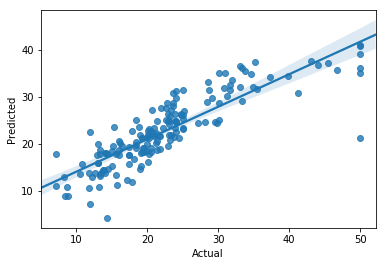

In [56]:
## Plotting functions 
#Scatter plot
predict_data=pd.DataFrame(data= {'Actual' : y_test,'Predicted' :predictions})
sns.regplot(x='Actual', y='Predicted', data=predict_data)
print('Mean Squared Error :',mean_squared_error(y_test, predictions))

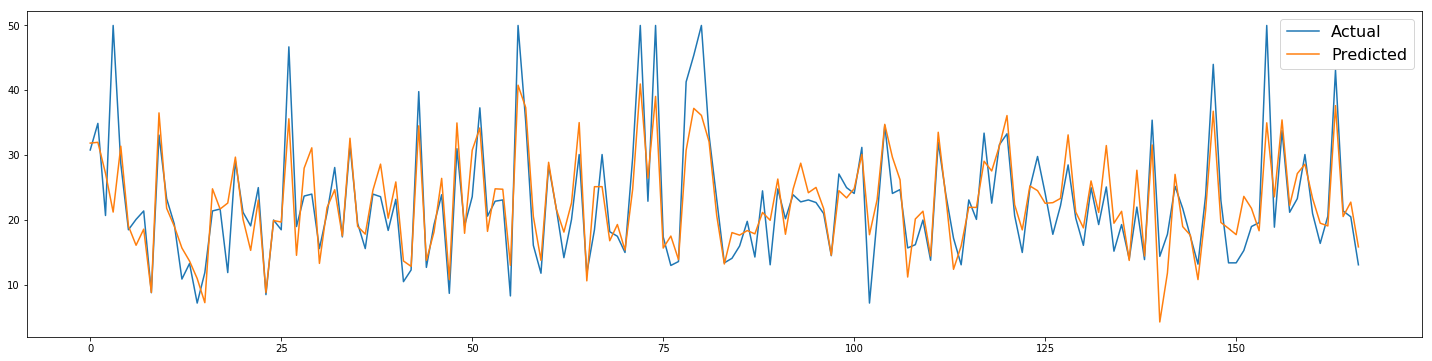

Mean Squared Error : 22.5748669474


In [57]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, predictions))

## Observations :
    1. We see that the model performs well and gives a MSE of 29.3 as close as sklearn's SGDREgressor, with the above set parameters

## Effect of learning rate on model performance
    1. Considering a set of learning rate and check the model performance of each with constant iteration 100

In [40]:
alpha_set = [0.1,0.08,0.06,0.05,0.01]
custom_sgd_mse=[]
sk_sgd_mse=[]
for i in alpha_set:
    # train custom model
    model=SGD_scratch(transformed_train_set,i,40,500,shuffle=True,divide=1)
    w,b=model.find_w_b()
    predictions=model.predict_func(w,b,x_test)
    custom_sgd_mse.append(mean_squared_error(y_test, predictions))
    
    ##train SGDregressor
    sklearn_model = SGDRegressor(max_iter=500,alpha=i)
    sklearn_model.fit(x_train, y_train)
    y_pred=sklearn_model.predict(x_test)
    sk_sgd_mse.append(mean_squared_error(y_test, y_pred))

--------------------
Iteration 0 :  mean  squared error : [ 675.95359159] 
lr_rate:  0.1
----------
--------------------
Iteration 1 :  mean  squared error : [ 399.72239006] 
lr_rate:  0.09659363289248456
----------
--------------------
Iteration 2 :  mean  squared error : [ 177.72521028] 
lr_rate:  0.09143078267618279
----------
--------------------
Iteration 3 :  mean  squared error : [ 204.2879561] 
lr_rate:  0.08530793667891054
----------
--------------------
Iteration 4 :  mean  squared error : [ 146.25921251] 
lr_rate:  0.07871199821209823
----------
--------------------
Iteration 5 :  mean  squared error : [ 123.66250658] 
lr_rate:  0.07196699602538442
----------
--------------------
Iteration 6 :  mean  squared error : [ 74.94247417] 
lr_rate:  0.06529478154043213
----------
--------------------
Iteration 7 :  mean  squared error : [ 95.46250714] 
lr_rate:  0.05884695206938755
----------
--------------------
Iteration 8 :  mean  squared error : [ 80.55186918] 
lr_rate:  0.05272

--------------------
Iteration 34 :  mean  squared error : [ 77.61054314] 
lr_rate:  0.0007986901980529905
----------
--------------------
Iteration 35 :  mean  squared error : [ 30.68009867] 
lr_rate:  0.000667672101195768
----------
--------------------
Iteration 36 :  mean  squared error : [ 23.01162972] 
lr_rate:  0.000557382261511526
----------
--------------------
Iteration 37 :  mean  squared error : [ 62.17947174] 
lr_rate:  0.0004646906813897008
----------
--------------------
Iteration 38 :  mean  squared error : [ 14.78804732] 
lr_rate:  0.0003869106936449131
----------
--------------------
Iteration 39 :  mean  squared error : [ 22.98966989] 
lr_rate:  0.0003217419825538272
----------
--------------------
Iteration 40 :  mean  squared error : [ 56.99987] 
lr_rate:  0.0002672197422456405
----------
--------------------
Iteration 41 :  mean  squared error : [ 51.73927039] 
lr_rate:  0.00022166956867495543
----------
--------------------
Iteration 42 :  mean  squared error : [

--------------------
Iteration 10 :  mean  squared error : [ 94.33243281] 
lr_rate:  0.020840695989456766
----------
--------------------
Iteration 11 :  mean  squared error : [ 93.4822894] 
lr_rate:  0.01840573462840872
----------
--------------------
Iteration 12 :  mean  squared error : [ 91.20351987] 
lr_rate:  0.016190340723469823
----------
--------------------
Iteration 13 :  mean  squared error : [ 107.56063707] 
lr_rate:  0.01418892805863266
----------
--------------------
Iteration 14 :  mean  squared error : [ 91.62051605] 
lr_rate:  0.012392103264472305
----------
--------------------
Iteration 15 :  mean  squared error : [ 78.99013625] 
lr_rate:  0.010787952477310103
----------
--------------------
Iteration 16 :  mean  squared error : [ 59.85194991] 
lr_rate:  0.009363033528631107
----------
--------------------
Iteration 17 :  mean  squared error : [ 65.49038638] 
lr_rate:  0.00810313274076992
----------
--------------------
Iteration 18 :  mean  squared error : [ 69.081

## Plotting MSE for custom SGD vs  Sklearn SGD

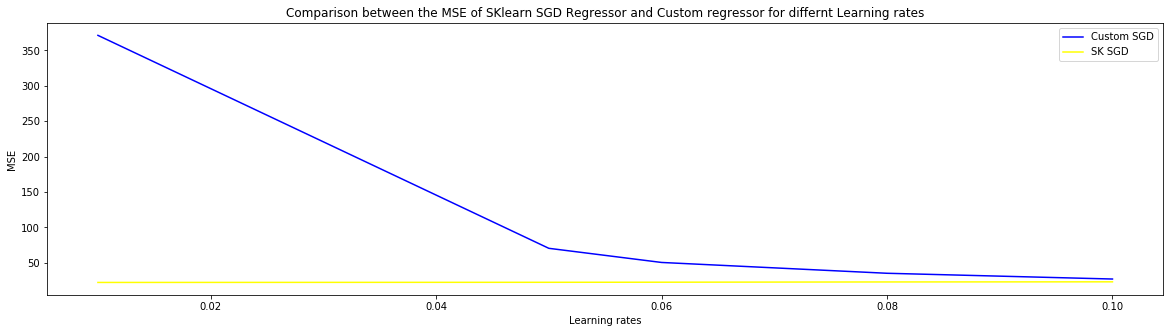

In [41]:
plt.figure(figsize=(20,5))
plt.plot(alpha_set, custom_sgd_mse, color='blue', label='Custom SGD')
plt.plot(alpha_set, sk_sgd_mse, color='yellow', label='SK SGD')
plt.xlabel('Learning rates')
plt.ylabel('MSE')
plt.title("Comparison between the MSE of SKlearn SGD Regressor and Custom regressor for differnt Learning rates")
plt.legend()
plt.show()

## Observations
    1.We can observe that our custom model has effect/fluctuations of learning rate to a greater extent than sklearn SGD.
    2.With lower values of learning rate tends to decrease MSE (i.e learning rate < 0.06 )

## Effect of number of iterations on model performance
    1. Considering a set of iterations rate and check the model performance of each with constant learning rate 0.05
    

In [42]:
iter_set = [100,200,500,600,1000]
custom_sgd_mse=[]
sk_sgd_mse=[]
for i in iter_set:
    # train custom model
    model=SGD_scratch(transformed_train_set,0.05,40,i,shuffle=True,divide=1)
    w,b=model.find_w_b()
    predictions=model.predict_func(w,b,x_test)
    custom_sgd_mse.append(mean_squared_error(y_test, predictions))
    
    ##train SGDregressor
    sklearn_model = SGDRegressor(max_iter=i,alpha=0.05,shuffle=True)
    sklearn_model.fit(x_train, y_train)
    y_pred=sklearn_model.predict(x_test)
    sk_sgd_mse.append(mean_squared_error(y_test, y_pred))

--------------------
Iteration 0 :  mean  squared error : [ 775.0968397] 
lr_rate:  0.05
----------
--------------------
Iteration 1 :  mean  squared error : [ 568.3943565] 
lr_rate:  0.04829681644624228
----------
--------------------
Iteration 2 :  mean  squared error : [ 470.45808964] 
lr_rate:  0.045715391338091396
----------
--------------------
Iteration 3 :  mean  squared error : [ 301.47756491] 
lr_rate:  0.04265396833945527
----------
--------------------
Iteration 4 :  mean  squared error : [ 253.85401421] 
lr_rate:  0.03935599910604912
----------
--------------------
Iteration 5 :  mean  squared error : [ 235.62347647] 
lr_rate:  0.03598349801269221
----------
--------------------
Iteration 6 :  mean  squared error : [ 195.01186375] 
lr_rate:  0.03264739077021606
----------
--------------------
Iteration 7 :  mean  squared error : [ 163.57443764] 
lr_rate:  0.029423476034693776
----------
--------------------
Iteration 8 :  mean  squared error : [ 149.84551938] 
lr_rate:  0.

--------------------
Iteration 38 :  mean  squared error : [ 82.36750203] 
lr_rate:  0.00024181918352807072
----------
--------------------
Iteration 39 :  mean  squared error : [ 60.34879169] 
lr_rate:  0.00020108873909614202
----------
--------------------
Iteration 40 :  mean  squared error : [ 30.64843659] 
lr_rate:  0.00016701233890352533
----------
--------------------
Iteration 41 :  mean  squared error : [ 71.1370793] 
lr_rate:  0.00013854348042184714
----------
--------------------
Iteration 42 :  mean  squared error : [ 131.89442921] 
lr_rate:  0.00011479227706141535
----------
--------------------
Iteration 43 :  mean  squared error : [ 45.55491446] 
lr_rate:  9.500359442547791e-05
----------
--------------------
Iteration 44 :  mean  squared error : [ 77.94402639] 
lr_rate:  7.853792290396699e-05
----------
--------------------
Iteration 45 :  mean  squared error : [ 86.11882627] 
lr_rate:  6.485470969908735e-05
----------
--------------------
Iteration 46 :  mean  squared 

--------------------
Iteration 27 :  mean  squared error : [ 79.21650536] 
lr_rate:  0.0016778879813385582
----------
--------------------
Iteration 28 :  mean  squared error : [ 71.26139965] 
lr_rate:  0.001417891710000172
----------
--------------------
Iteration 29 :  mean  squared error : [ 115.644753] 
lr_rate:  0.0011961537346997415
----------
--------------------
Iteration 30 :  mean  squared error : [ 67.03019973] 
lr_rate:  0.0010074393633453963
----------
--------------------
Iteration 31 :  mean  squared error : [ 60.602129] 
lr_rate:  0.0008471521492226282
----------
--------------------
Iteration 32 :  mean  squared error : [ 82.57721976] 
lr_rate:  0.0007112720121701017
----------
--------------------
Iteration 33 :  mean  squared error : [ 50.55244593] 
lr_rate:  0.0005962958325760317
----------
--------------------
Iteration 34 :  mean  squared error : [ 56.15537698] 
lr_rate:  0.000499181373783119
----------
--------------------
Iteration 35 :  mean  squared error : [ 

## Plotting MSE for custom SGD vs  Sklearn SGD

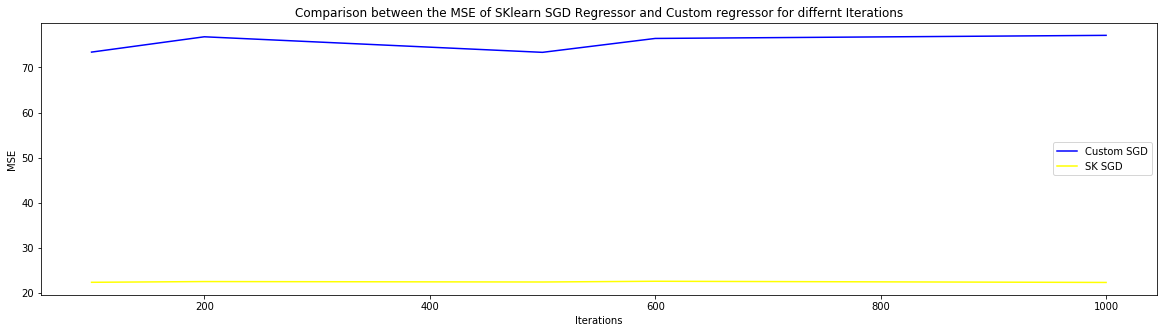

In [43]:
plt.figure(figsize=(20,5))
plt.plot(iter_set, custom_sgd_mse, color='blue', label='Custom SGD')
plt.plot(iter_set, sk_sgd_mse, color='yellow', label='SK SGD')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title("Comparison between the MSE of SKlearn SGD Regressor and Custom regressor for differnt Iterations")
plt.legend()
plt.show()

## Observations
    1.We can observe that our custom model has effect/fluctuations of iterations to a greater extent than sklearn SGD.
    2.As number of iterations increase it converges to optimumum better. 

## Comparing Weights and MSE  

In [44]:
weights

,Sklearn SGD,Sklearn Linear Regression,Custom SGD (Trial 1),Custom SGD (Trial 2)
0,-0.712181,-0.863947,1.652214e+12,0.088773
1,0.548530,0.743271,-1.479200e+12,0.999658
2,-0.709605,-0.412015,-1.618272e+12,-0.749712
3,1.082881,1.000662,-2.599226e+11,0.912983
4,-1.573638,-2.252131,-9.759675e+11,-0.076970
5,2.437577,2.217033,-3.254227e+10,3.052044
6,-0.056164,0.065871,-9.869387e+11,0.302897
7,-2.604154,-3.255986,-7.281176e+11,-1.504199
8,1.513546,2.875749,6.985335e+11,-0.798913
9,-0.917969,-1.996244,-1.128136e+12,-0.229589


In [58]:
##http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Model", "MSE"]
print('MSE comparisons ')
x.add_row(["Sklearn SGD",22.2])
x.add_row(["Sklearn Linear Regression",22.1])
x.add_row(["Custom SGD (Trial 1)",8.9e+24])
x.add_row(["Custom SGD (Trial 2)",22.5])
print(x)

MSE comparisons 
+---------------------------+---------+
|           Model           |   MSE   |
+---------------------------+---------+
|        Sklearn SGD        |   22.2  |
| Sklearn Linear Regression |   22.1  |
|    Custom SGD (Trial 1)   | 8.9e+24 |
|    Custom SGD (Trial 2)   |   22.5  |
+---------------------------+---------+


### Conclusion:
     1. After applying custom SGD to our dataset with learning rate 0.2 and iterations of 500 we see that MSE is closer to the SKlearn SGD MSE 22.2.
 Ref :https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python,
 https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent
 